<a href="https://colab.research.google.com/github/koshik3456/Module_6/blob/main/Project_ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  - Yulu Bike Sharing Demand Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a **regression supervised machine learning model** to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After **preprocessing** and **cleaning** **the** **data**, I split it into **training** **and** **test** **sets** and used the training data to train our machine learning model. I experimented with several different**model architectures and hyperparameter** settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including **mean absolute error, root mean squared error, and R-squared**. I found that our model was able to make highly accurate predictions, with an **R-squared value of 0.88 and a mean absolute error of just 2.58**.

In addition to evaluating the performance of our model on the test data, I also conducted a series of **ablation studies** to understand the impact of individual features on the model's performance. **I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.**

# **Problem Statement**


In the evolving landscape of urban mobility, companies like Yulu Bike are at the forefront of providing efficient and eco-friendly transportation solutions. Accurate prediction of bike-sharing demand is crucial for optimizing fleet management, enhancing customer satisfaction, and maximizing operational efficiency. By analyzing data related to bike-sharing demand, Yulu Bike aims to gain a deeper understanding of the factors influencing bike rentals. The dataset includes a range of variables such as weather conditions, time of day, and special events, which impact bike usage patterns.

Leveraging this data, Yulu Bike can:

1. Optimize Fleet Management:

Predicting demand based on factors like temperature, humidity, and time of day allows Yulu Bike to deploy bikes more strategically, ensuring availability during peak times and reducing idle resources.

2. Enhance Customer Experience:

By understanding how external factors such as weather and holidays affect demand, Yulu Bike can better align their service offerings with customer needs, improving overall user satisfaction.

3. Improve Operational Efficiency:

Accurate demand forecasts help in planning maintenance schedules and managing bike distribution across different areas, leading to more efficient operations.

4. Adapt to Environmental Factors:

Insights into how weather conditions and seasonal variations impact bike usage enable Yulu Bike to adjust their strategies in real-time, ensuring optimal service delivery throughout the year.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import datetime as dt  # Import datetime for working with dates and times

import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import seaborn as sns  # Import Seaborn for enhanced data visualization
from scipy import stats  # Import SciPy for statistical functions
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for converting categorical labels to numbers
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling

# Importing Pandas again (unnecessary, already imported above)
import pandas as pd

from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and test sets

from sklearn.linear_model import LinearRegression  # Import LinearRegression for building linear regression models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import metrics for evaluating model performance

from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning with grid search
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor for building random forest regression models
from sklearn.model_selection import cross_val_score  # Import cross_val_score for cross-validation scoring

# Importing LinearRegression again (unnecessary, already imported above)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV again (unnecessary, already imported above)
from sklearn.preprocessing import StandardScaler  # Import StandardScaler again (unnecessary, already imported above)
from sklearn.pipeline import Pipeline  # Import Pipeline for creating a machine learning pipeline

from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor again (unnecessary, already imported above)

from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV for hyperparameter tuning with randomized search
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor again (unnecessary, already imported above)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import metrics again (unnecessary, already imported above)

import numpy as np  # Import NumPy again (unnecessary, already imported above)
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Importing modules for data splitting and random search for hyperparameter tuning
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor for building gradient boosting regression models
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor for building decision tree regression models

# Importing warnings library. The warnings module handles warnings in Python.
import warnings  # Import warnings to manage warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages during execution


### Dataset Loading

In [3]:
# Load Dataset

bike_df = pd.read_csv('/content/SeoulBikeData.csv' , encoding='latin-1')

### Dataset First View

In [4]:
# Dataset First Look


bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#viewing the last 5 data of the datase

bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

data_set_shape = bike_df.shape

print(f'The Bike Rental Dataset Has {data_set_shape[0]} Rows and It has {data_set_shape[1]} Columns')

The Bike Rental Dataset Has 8760 Rows and It has 14 Columns


In [ ]:
#extracting all the column name of the dataset
print(bike_df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f'The No. Of Duplicate Value in Bike Rental Dataset is {bike_df.duplicated().sum()}')

The No. Of Duplicate Value in Bike Rental Dataset is 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

bike_df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


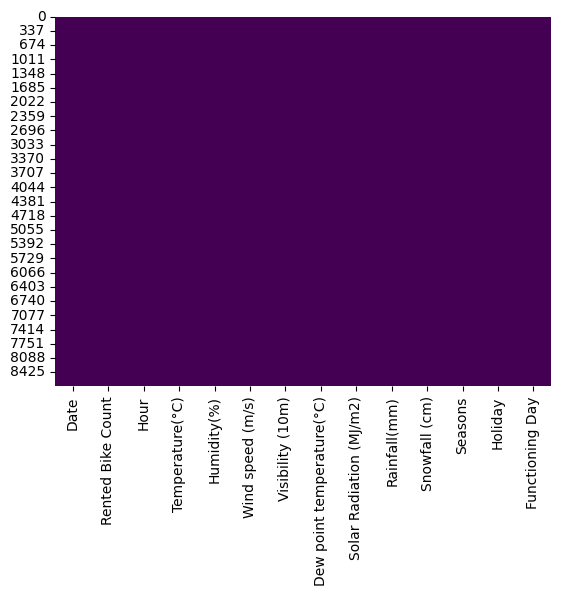

In [ ]:
# Visualizing the missing values

sns.heatmap(bike_df.isnull() , cbar = False, cmap= 'viridis')

plt.show()

### What did you know about your dataset?

### 1. **Overview of the Dataset:**
   - The dataset consists of **8760 rows** and **14 columns**.
   - It provides data on bike rentals with information such as weather conditions, date, time, and operational status.
   - There are **no missing or duplicate values**.

### 2. **Data Types and Column Categorization:**

#### a. **Date/Time:**
   - **Date**: Currently stored as an object (string) – 365 unique values. This needs to be converted into **datetime format** for accurate time-based analysis.
   - **Hour**: Integer – 24 unique values.

#### b. **Numerical Columns (Continuous):**
   - **Rented Bike Count**: Integer – 2166 unique values.
   - **Temperature (°C)**: Float – 546 unique values.
   - **Humidity (%)**: Integer – 90 unique values.
   - **Wind Speed (m/s)**: Float – 65 unique values.
   - **Visibility (10m)**: Integer – 1789 unique values.
   - **Dew Point Temperature (°C)**: Float – 556 unique values.
   - **Solar Radiation (MJ/m²)**: Float – 345 unique values.
   - **Rainfall (mm)**: Float – 61 unique values.
   - **Snowfall (cm)**: Float – 51 unique values.

#### c. **Categorical Columns:**
   - **Seasons**: Object (string) – 4 unique values (Winter, Spring, Summer, Fall).
   - **Holiday**: Object (string) – 2 unique values (Yes, No).
   - **Functioning Day**: Object (string) – 2 unique values (Yes, No).




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Features: {bike_df.columns.tolist()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [ ]:
# Dataset Describe

bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in bike_df.columns.tolist():
  print(f'The No. of Unique Value in {i} is : {bike_df[i].nunique()}')

The No. of Unique Value in Date is : 365
The No. of Unique Value in Rented Bike Count is : 2166
The No. of Unique Value in Hour is : 24
The No. of Unique Value in Temperature(°C) is : 546
The No. of Unique Value in Humidity(%) is : 90
The No. of Unique Value in Wind speed (m/s) is : 65
The No. of Unique Value in Visibility (10m) is : 1789
The No. of Unique Value in Dew point temperature(°C) is : 556
The No. of Unique Value in Solar Radiation (MJ/m2) is : 345
The No. of Unique Value in Rainfall(mm) is : 61
The No. of Unique Value in Snowfall (cm) is : 51
The No. of Unique Value in Seasons is : 4
The No. of Unique Value in Holiday is : 2
The No. of Unique Value in Functioning Day is : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
bike_df = bike_df.rename(columns = {'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

# **Breaking date column**

In [ ]:
# replacing '-' to '/' then it will be easy to convert data type of date column into the date time format

bike_df['Date'] = bike_df['Date'].str.replace('-', '/')

bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')  #converting date column in the date format

In [ ]:
# Now, split date into separate year, month, and day columns

bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month_name()
bike_df['day'] = bike_df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend"

bike_df['weekday_or_weekend'] = bike_df['day'].apply(lambda x : 'Weekend' if x == 'Saturday' or x =='Sunday' else 'Weekday')


In [ ]:
#printing first 5 data to check all operation we have done till now is sucessfull or not

bike_df.drop('Date', axis=1, inplace=True)

bike_df.head(10)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,weekday_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,Weekday


In [ ]:
# Display information about the DataFrame, including the number of entries, column names, non-null counts, and data types

bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  year                   8760 non-null   int32  
 14  month                  8760 non-null   object 
 15  day 

### What all manipulations have you done and insights you found?

### Data Manipulations:
1. **Renaming Columns**:
   - Standardized column names by replacing spaces with underscores and simplifying names (e.g., `'Rented Bike Count'` became `'Rented_Bike_Count'`, `'Temperature(°C)'` became `'Temperature'`, etc.).
   
2. **Date Formatting**:
   - Replaced the hyphen `'-'` with a slash `'/'` in the `'Date'` column to standardize the date format.
   - Converted the `'Date'` column into a datetime format using the format `'%d/%m/%Y'`.

3. **Date Splitting**:
   - Created new columns for `'year'`, `'month'`, and `'day'` from the `'Date'` column for easier time-based analysis.
   
4. **Weekday vs. Weekend**:
   - Created a new column `'weekday_or_weekend'` that categorizes each entry as either `'Weekend'` (Saturday or Sunday) or `'Weekday'` based on the day of the week.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

# Plotting a histogram for analyzing the distribution of temperature values

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'Temperature' column with a kernel density estimate (KDE)
sns.histplot(bike_df['Temperature'], kde=True, bins=10, color='orange')

# Set the title of the plot
plt.title('Temperature Distribution')

# Label the x-axis
plt.xlabel('Temperature (°C)')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()



NameError: name 'plt' is not defined

##### 1. Why did you pick the specific chart?

I chose a **histogram with a KDE curve** because it is one of the best tools for conducting **univariate analysis** (analyzing a single variable) when the goal is to understand the **distribution** of continuous numerical data, like temperature.

### Reasons for choosing this chart:

1. **Visualizing Frequency Distribution**:
   - The **histogram** clearly shows how frequently different temperature values occur, which helps identify common temperature ranges and the overall shape of the distribution.

2. **Distribution Shape and Skewness**:
   - A histogram reveals the **shape of the distribution**, whether it is normal, skewed, or has multiple peaks. In this case, it helps to see the **slightly negatively skewed** nature of the temperature data.
   - The **KDE curve** smoothens out the data to give a better understanding of the underlying density of the data points, complementing the histogram.

3. **Outliers and Spread**:
   - The histogram, combined with the KDE curve, allows for quick identification of **outliers** (if any) and provides insights into the **spread** of the temperature data, such as the range and where most data points are concentrated.



##### 2. What is/are the insight(s) found from the chart?

From the chart, several key insights about the **Temperature** data can be gathered:

### 1. **Temperature Distribution**:
   - The data shows a **roughly normal distribution**, with most temperature values concentrated between **0°C and 25°C**.
   - The distribution is slightly **negatively skewed**, meaning colder temperatures (below the mean) occur slightly more frequently than very warm temperatures.

### 2. **Most Frequent Temperature Range**:
   - The **peak of the distribution** occurs around **10°C to 20°C**, indicating this is the most common temperature range in the dataset. This could imply that the majority of days or hours in the dataset experience moderate temperatures.

### 3. **Extremes Are Less Common**:
   - **Extreme temperatures**, both **very cold** (below -10°C) and **very hot** (above 30°C), are relatively rare in the dataset, as seen from the lower bars in these regions.
   - This suggests that the dataset primarily contains mild to moderate temperature values, with fewer extreme weather conditions.

### 4. **Spread of Temperature**:
   - The temperature values cover a wide range, from **around -15°C to 35°C**, showing that the data includes both cold and hot periods.
   - However, the majority of the data is concentrated between **0°C and 25°C**, with temperatures below 0°C and above 25°C occurring less frequently.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### **Positive Business Impact Insights:**

The insights gained from the temperature distribution can be leveraged to create positive business outcomes, particularly for businesses where **temperature plays a role in customer behavior**, product demand, or service delivery. Here’s how:

1. **Optimal Temperature for Business Operations**:
   - The most common temperature range, between **10°C and 20°C**, is moderate and generally comfortable for outdoor activities. If the business involves outdoor services (e.g., bike rentals, outdoor events, tourism), knowing that this range is frequent allows the business to **plan promotions** and **optimize staffing levels** for these temperature conditions.

2. **Seasonal Demand Forecasting**:
   - If the data represents a specific season or location, knowing that extreme temperatures (below -10°C or above 30°C) are rare means that the business can focus more on planning for mild to warm weather. For example:
     - **Bike rental services** may see higher demand in **moderate temperatures** (10°C to 20°C) and can increase inventory or staffing accordingly.
     - **Retail businesses** can **stock temperature-sensitive products** (like seasonal clothing) in line with the common temperature ranges, optimizing inventory and sales.

3. **Energy Management**:
   - Businesses involved in **energy services**, such as heating or cooling, can anticipate that energy demand will likely peak when temperatures move towards the extremes (cold or hot). However, since extreme temperatures are rare, businesses can focus on efficiency measures during **moderate temperature periods** to reduce operational costs.

4. **Customer Comfort and Experience**:
   - Businesses that provide **customer experiences (e.g., restaurants with outdoor seating, theme parks)** can optimize operations during the most common temperature ranges, ensuring that they provide the best services during periods of moderate temperatures when customers are more likely to engage in outdoor activities.



#### Chart - 2

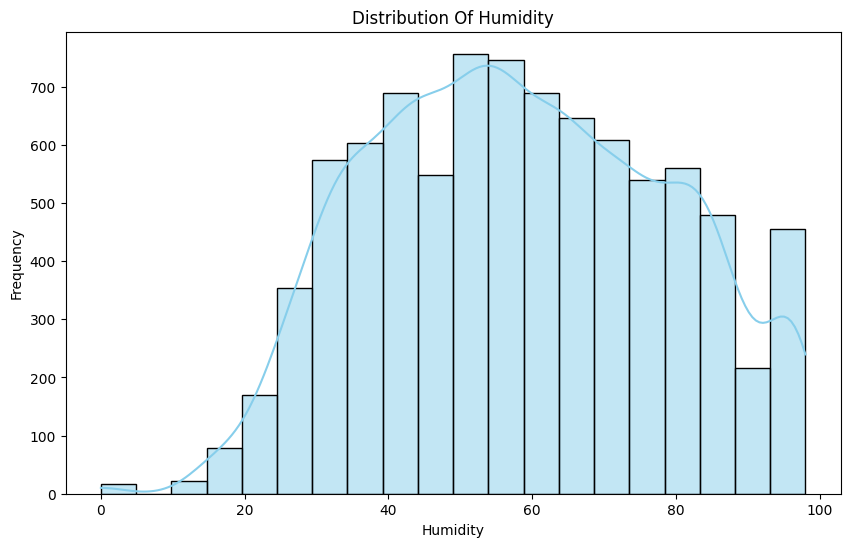

In [ ]:
# Chart - 2 visualization code

# Visualizing the distribution of Humidity in the dataset

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'Humidity' column with a kernel density estimate (KDE)

sns.histplot(x=bike_df['Humidity'], kde=True, bins=20, color='skyblue')

# Set the title of the plot
plt.title('Distribution Of Humidity')

# Label the x-axis
plt.xlabel('Humidity')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()




##### 1. Why did you pick the specific chart?

I chose a **histogram with a KDE curve** because it is one of the best tools for conducting **univariate analysis** (analyzing a single variable) when the goal is to understand the **distribution** of continuous numerical data, like humidity.

### Reasons for choosing this chart:

1. **Visualizing Frequency Distribution**:
   - The **histogram** clearly shows how frequently different humidity values occur, which helps identify common humidity ranges and the overall shape of the distribution.

2. **Distribution Shape and Skewness**:
   - A histogram reveals the **shape of the distribution**, whether it is normal, skewed, or has multiple peaks. In this case, it helps to observe that the humidity distribution is **slightly negatively skewed**, meaning there are fewer lower humidity values.
   - The **KDE curve** smoothens out the data to give a better understanding of the underlying density of the data points, complementing the histogram.

3. **Outliers and Spread**:
   - The histogram, combined with the KDE curve, allows for quick identification of **outliers** (if any) and provides insights into the **spread** of humidity data, such as the range and where most data points are concentrated.




##### 2. What is/are the insight(s) found from the chart?

### Insights from the **Humidity Distribution** Chart:

1. **Most Common Humidity Range**:
   - The majority of the data points fall between **40% and 80% humidity**, indicating that most observations in the dataset occur under **moderate humidity conditions**. This range seems to be the most common environmental condition in the dataset.

2. **Peak at 60-70%**:
   - The peak of the distribution occurs around **60-70%**, meaning that **humidity levels around this range are the most frequent**. This could suggest that the climate or conditions where the data was collected generally hover around these humidity levels.

3. **High Humidity Occurrence**:
   - There are relatively fewer observations with **humidity above 80%**, though it still reaches **up to 100%**. This suggests that **extremely high humidity conditions are present but less frequent**.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### **Positive Business Impact Insights:**

The insights gained from the **humidity distribution** can be leveraged to create positive business outcomes, particularly for businesses where **weather conditions**, including humidity, affect customer behavior, product demand, or service delivery. Here’s how:

1. **Optimal Humidity for Business Operations**:
   - The chart shows that the most common humidity range is between **40% and 80%**, which is generally comfortable for outdoor activities. For businesses such as **bike rentals, outdoor events, or tourism**, knowing that this range is frequent allows the business to **plan promotions** and **optimize staffing levels** for these weather conditions, ensuring a good customer experience.
   
2. **Seasonal Demand Forecasting**:
   - If the data represents a specific location or season, knowing that extreme humidity (either too low or too high) is rare means that businesses can focus more on **operational planning** for moderate humidity conditions. For example:
     - A **bike rental service** might see higher demand during **moderate humidity** and plan for increased inventory or staff availability.
     - **Retail businesses** can adjust their **inventory** to align with typical humidity conditions, stocking weather-appropriate products (e.g., breathable clothing for higher humidity).

3. **Customer Comfort and Experience**:
   - Businesses providing **customer experiences (e.g., outdoor restaurants, parks, or entertainment venues)** can optimize their operations during the most common humidity levels, ensuring customers are comfortable and more likely to engage with their services. They could also plan **special offers** or events during the most comfortable periods.

4. **Strategic Maintenance Scheduling**:
   - For industries where weather impacts the **maintenance of equipment** (e.g., bike rentals or other outdoor equipment services), knowing that extreme humidity is uncommon allows businesses to schedule **maintenance work** during more comfortable humidity periods without heavily impacting service availability.


#### Chart - 3

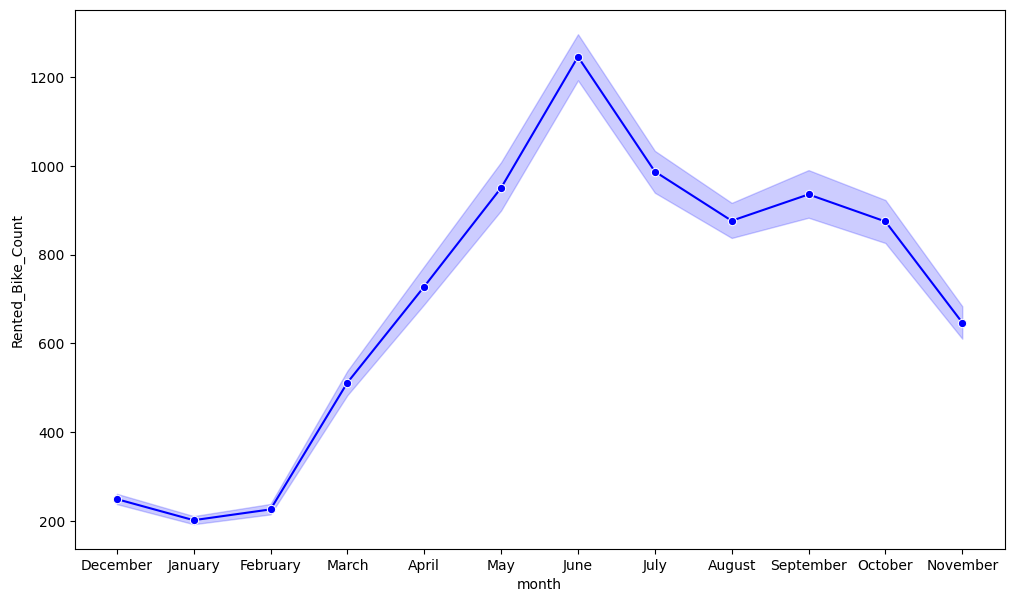

In [ ]:
# Chart - 3 visualization code

# Sum Of Rented Bikes According To Month

# Set the color palette for the plot to 'viridis'
sns.set_palette('viridis')

# Create a figure and axis with specified size for the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Create a line plot to visualize the total number of rented bikes per month
sns.lineplot(data=bike_df, x='month', y='Rented_Bike_Count', color='blue', marker='o')

# Display the plot
plt.show()


#### Chart - 4

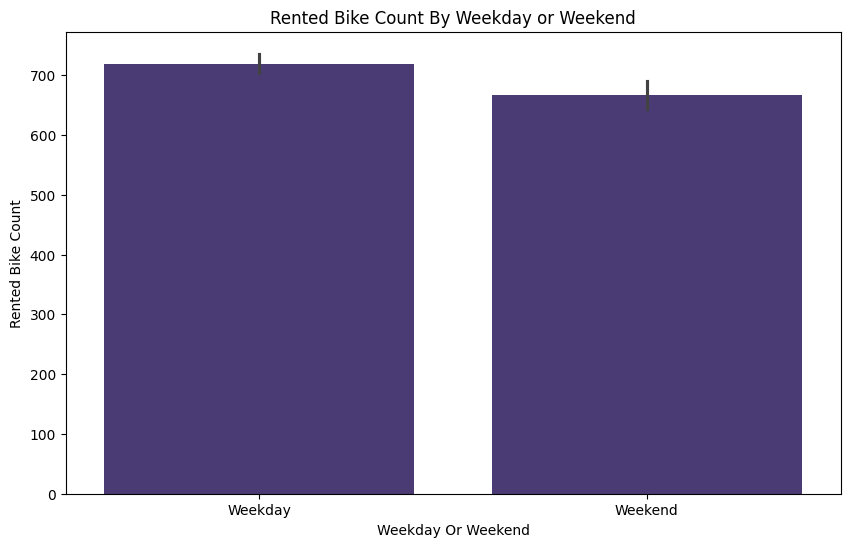

In [ ]:
# Chart - 4 visualization code

# Rented bike count by weekdays or weekends

# Create a figure and axis with specified size for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot to visualize the count of rented bikes based on whether the day is a weekday or weekend
sns.barplot(x=bike_df['weekday_or_weekend'], y=bike_df['Rented_Bike_Count'])

# Set the title of the plot to indicate what the data represents
plt.title('Rented Bike Count By Weekday or Weekend')

# Label the x-axis
plt.xlabel('Weekday Or Weekend')

# Label the y-axis
plt.ylabel('Rented Bike Count')

# Display the plot
plt.show()


#### Chart - 5

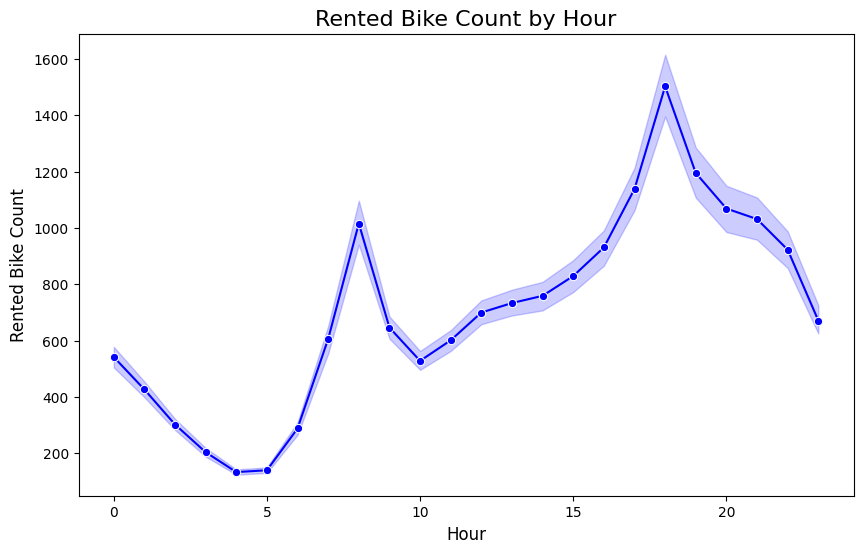

In [ ]:
# Chart - 5 visualization code

# Plotting the graph to analyze Rented Bike Count By Hour

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a line plot to visualize the relationship between the hour of the day and the count of rented bikes
sns.lineplot(x='Hour', y='Rented_Bike_Count', data=bike_df, marker='o', color='b')

# Set the title of the plot with a larger font size
plt.title('Rented Bike Count by Hour', fontsize=16)

# Label the x-axis with a larger font size
plt.xlabel('Hour', fontsize=12)

# Label the y-axis with a larger font size
plt.ylabel('Rented Bike Count', fontsize=12)

# Display the plot
plt.show()


#### Chart - 6

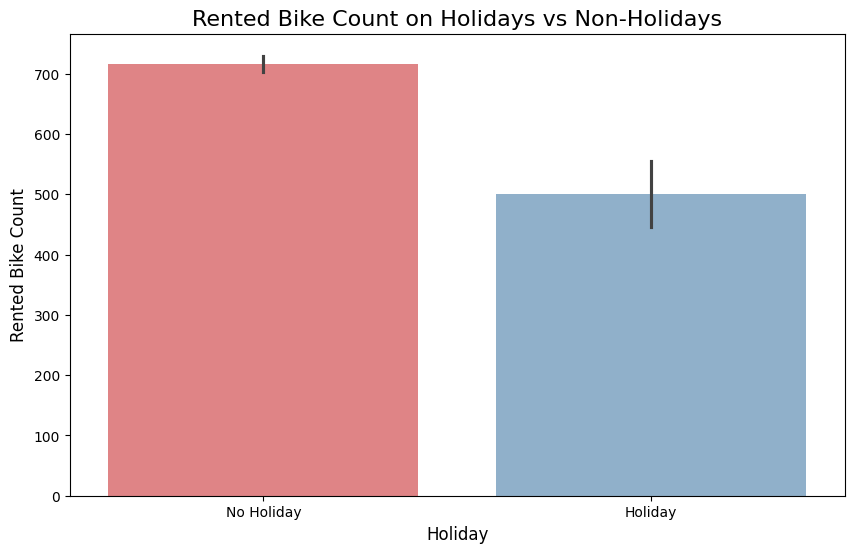

In [ ]:
# Chart - 6 visualization code

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday', y='Rented_Bike_Count', data=bike_df, palette='Set1', alpha=0.6)

# Set the title and labels
plt.title('Rented Bike Count on Holidays vs Non-Holidays', fontsize=16)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

# Show the plot
plt.show()



#### Chart - 7

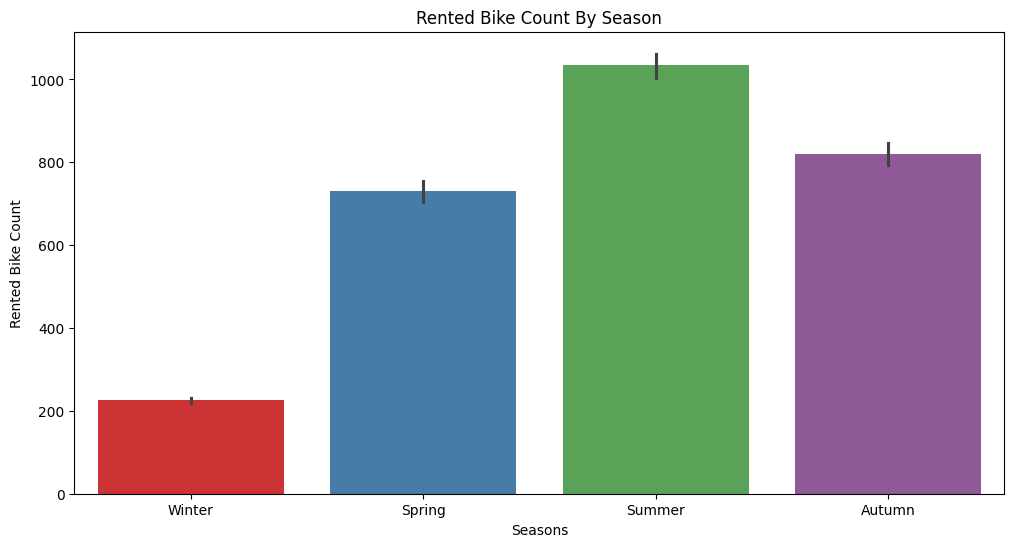

In [ ]:
# Chart - 7 visualization code

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize the relationship between seasons and the count of rented bikes

sns.barplot(x=bike_df['Seasons'], y=bike_df['Rented_Bike_Count'], palette='Set1')

# Set the title of the plot to indicate what it represents
plt.title('Rented Bike Count By Season')

# Label the x-axis to indicate what the data represents
plt.xlabel('Seasons')

# Label the y-axis to indicate what the data represents
plt.ylabel('Rented Bike Count')

# Display the plot
plt.show()



#### Chart - 8

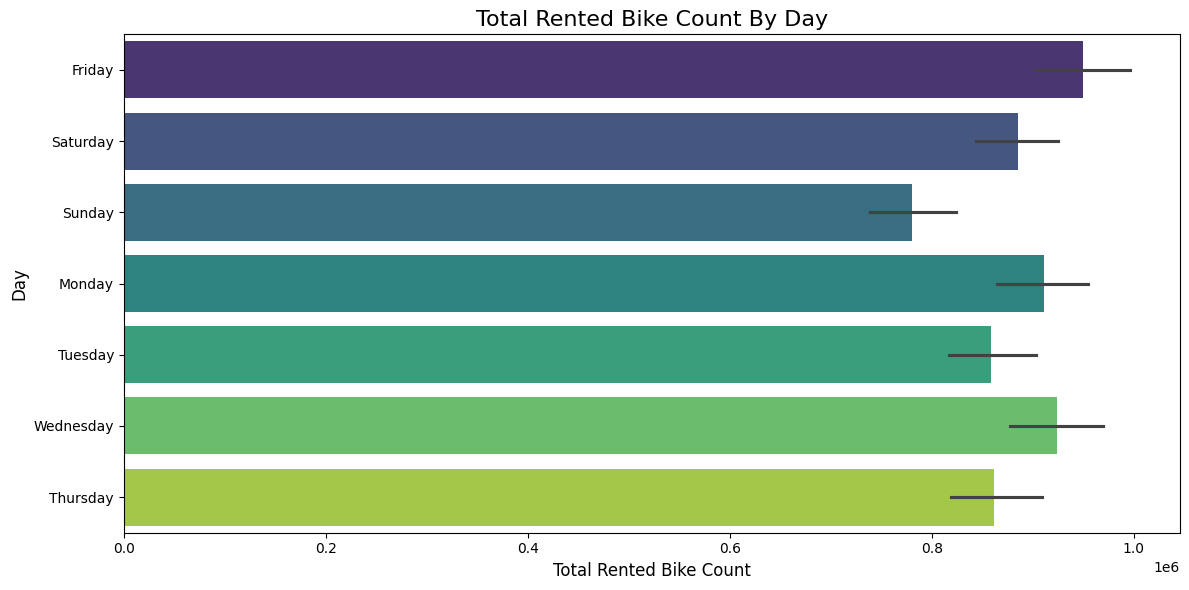

In [ ]:
# Chart - 8 visualization code


# Create a horizontal bar plot for weekly data
plt.figure(figsize=(12, 6))
sns.barplot(data=bike_df, x='Rented_Bike_Count', y='day', estimator=sum, palette='viridis')

# Set title and labels
plt.title('Total Rented Bike Count By Day', fontsize=16)
plt.xlabel('Total Rented Bike Count', fontsize=12)
plt.ylabel('Day', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()





#### Chart - 9

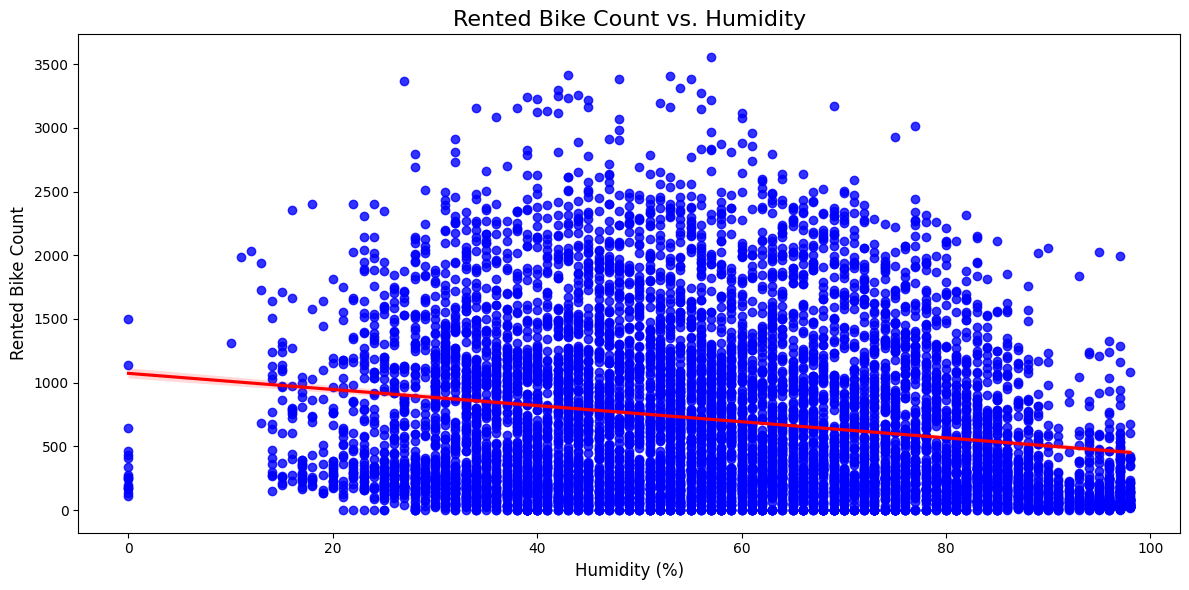

In [ ]:
# Chart - 9 visualization code


# Create the scatter plot with a trend line
plt.figure(figsize=(12, 6))
sns.regplot(data=bike_df, x='Humidity', y='Rented_Bike_Count',
            marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set title and labels
plt.title('Rented Bike Count vs. Humidity', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


#### Chart - 10

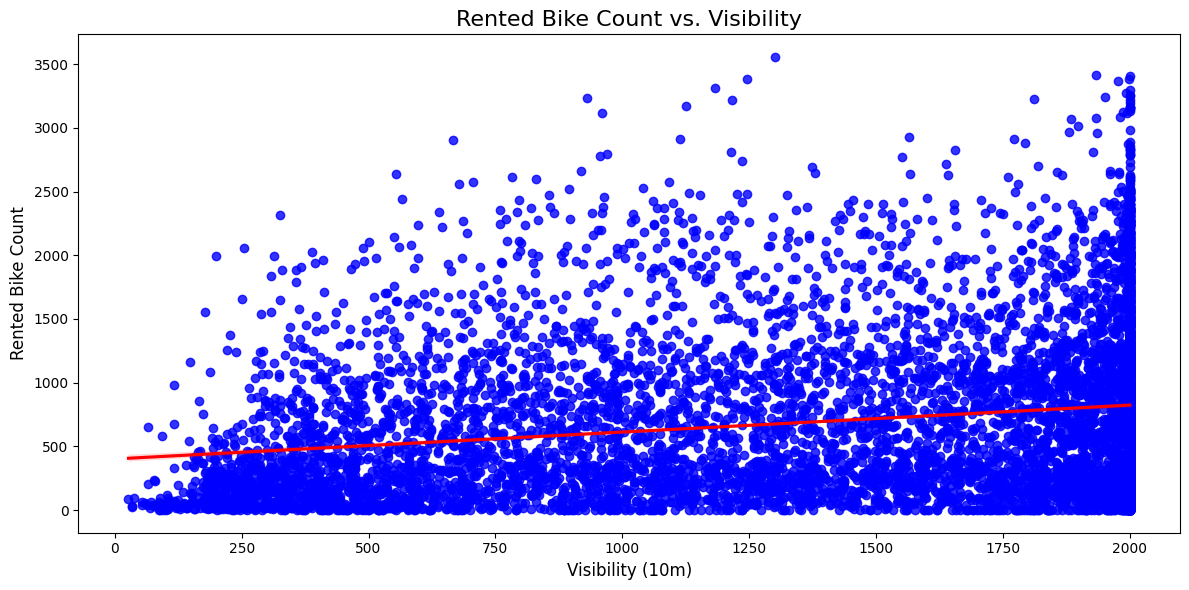

In [ ]:
# Chart - 10 visualization code

# Create the scatter plot with a trend line for Visibility vs. Rented Bike Count
plt.figure(figsize=(12, 6))
sns.regplot(data=bike_df, x='Visibility', y='Rented_Bike_Count',
            marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set title and labels
plt.title('Rented Bike Count vs. Visibility', fontsize=16)
plt.xlabel('Visibility (10m)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


#### Chart - 11

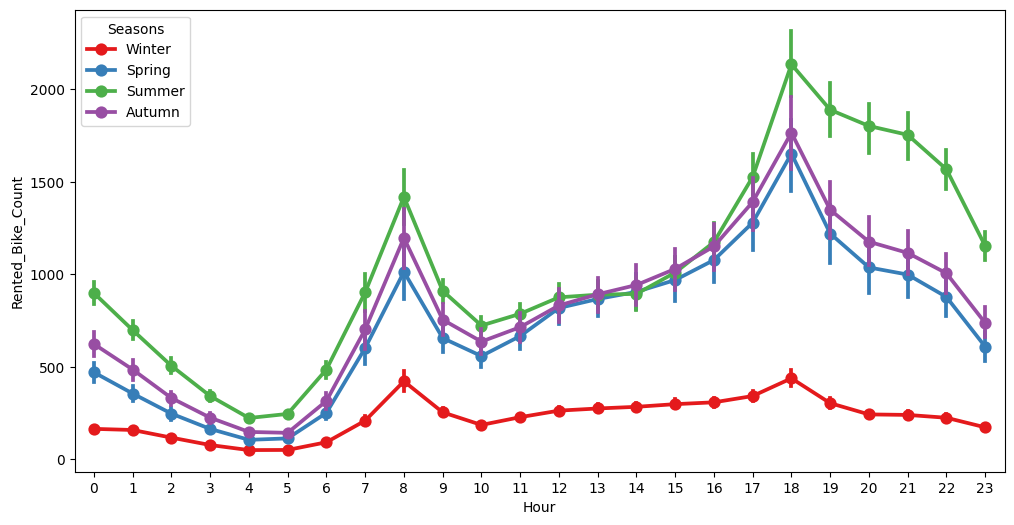

In [ ]:
# Chart - 11 visualization code

# Create a figure and axis with a specified size for the plot
fig = plt.subplots(figsize=(12, 6))

# Create a point plot to visualize the relationship between the hour of the day and the count of rented bikes
sns.pointplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='Seasons', palette='Set1')

# Set the title of the plot to indicate what it represents
ax.set(title='Count of Rented Bikes According to Seasons')

# Display the plot
plt.show()


#### Chart - 12

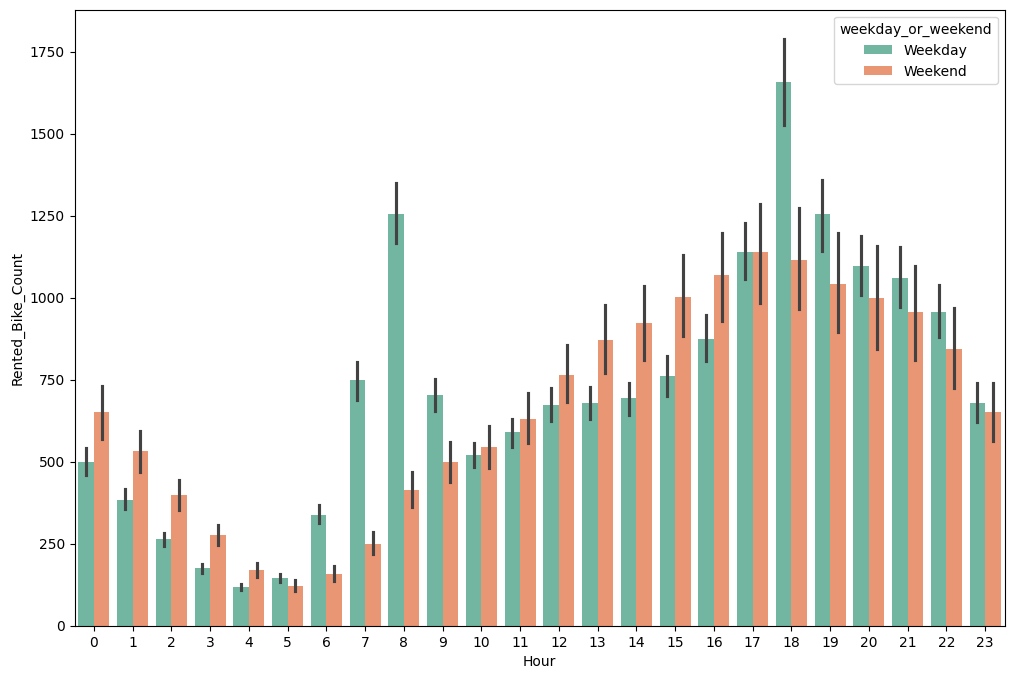

In [ ]:
# Chart - 12 visualization code

# Analysis of data through visualization
# Create a figure and axis with a specified size for the plot
fig = plt.subplots(figsize=(12, 8))

# Create a bar plot to visualize the rented bike counts by hour, differentiated by weekday or weekend

sns.barplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='weekday_or_weekend', palette='Set2')

# Set the title of the plot to indicate what it represents
ax.set(title='Count of Rented Bikes According to Weekdays and Weekends')

# Display the plot
plt.show()


#### Chart - 13 - Correlation Heatmap

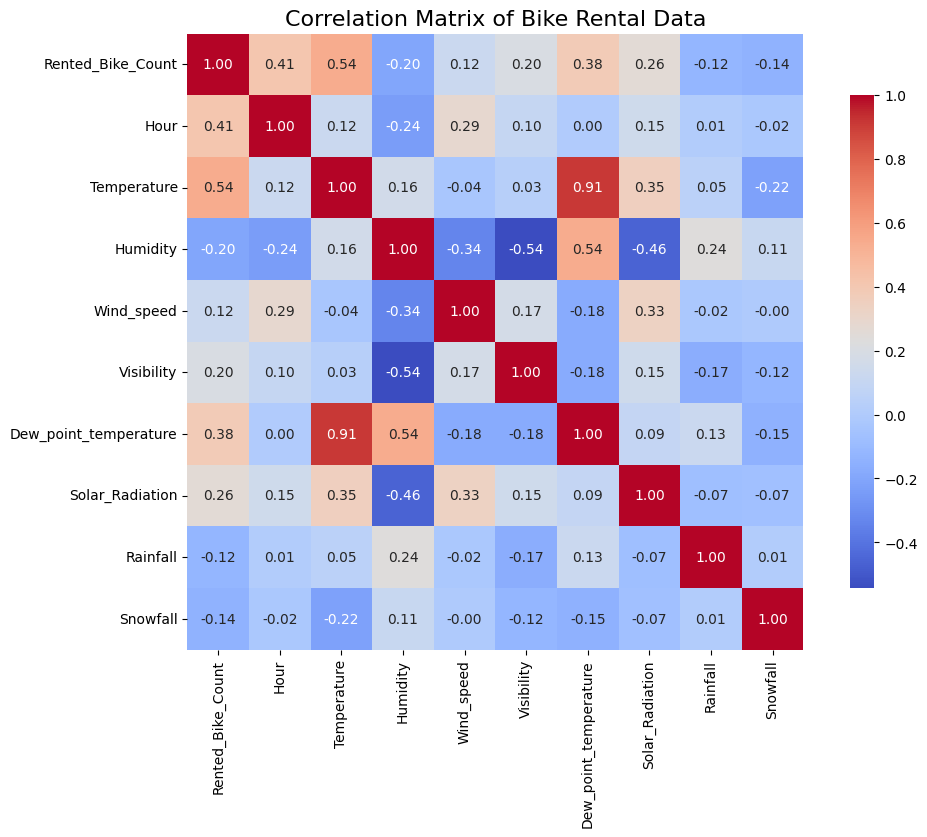

In [ ]:
# Correlation Heatmap visualization code
# Drop non-numeric columns for correlation analysis
numeric_df = bike_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix of Bike Rental Data', fontsize=16)

# Show the plot
plt.show()


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

### **Test for Difference in Bike Rentals on Holidays vs. Non-Holidays**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



#### Hypotheses:
- **Null Hypothesis (H₀):** The mean bike rental count on holidays is equal to the mean bike rental count on non-holidays.
- **Alternative Hypothesis (H₁):** The mean bike rental count on holidays is different from the mean bike rental count on non-holidays.




#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Splitting the data into holidays and non-holidays
holiday_data = bike_df[bike_df['Holiday'] == 'Holiday']['Rented_Bike_Count']
non_holiday_data = bike_df[bike_df['Holiday'] == 'No Holiday']['Rented_Bike_Count']

# Conducting the t-test
t_stat, p_value = stats.ttest_ind(holiday_data, non_holiday_data, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# If p-value < 0.05, we reject the null hypothesis.
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in bike rentals on holidays vs. non-holidays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in bike rentals on holidays vs. non-holidays.")


T-statistic: -7.5973291340447595
P-value: 1.545340334026087e-13
Reject the null hypothesis: There is a significant difference in bike rentals on holidays vs. non-holidays.


### Hypothetical Statement - 2

**Test for Difference in Bike Rentals Across Seasons**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Grouping the data by seasons
winter_data = bike_df[bike_df['Seasons'] == 'Winter']['Rented_Bike_Count']
spring_data = bike_df[bike_df['Seasons'] == 'Spring']['Rented_Bike_Count']
summer_data = bike_df[bike_df['Seasons'] == 'Summer']['Rented_Bike_Count']
autumn_data = bike_df[bike_df['Seasons'] == 'Autumn']['Rented_Bike_Count']

# Conducting the one-way ANOVA test
f_stat, p_value = stats.f_oneway(winter_data, spring_data, summer_data, autumn_data)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# If p-value < 0.05, we reject the null hypothesis.
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in bike rentals across seasons.")
else:
    print("Fail to reject the null hypothesis: No significant difference in bike rentals across seasons.")


F-statistic: 776.4678149879504
P-value: 0.0
Reject the null hypothesis: There is a significant difference in bike rentals across seasons.


### Hypothetical Statement - 3

**Test for the Impact of Temperature on Bike Rentals**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


#### Hypotheses:
- **Null Hypothesis (H₀):** There is no correlation between temperature and bike rentals.
- **Alternative Hypothesis (H₁):** There is a significant correlation between temperature and bike rentals.

#### Test to Use:
- Pearson correlation (if data is normally distributed), or Spearman's rank correlation (if not).



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Pearson correlation test
corr, p_value = stats.pearsonr(bike_df['Temperature'], bike_df['Rented_Bike_Count'])

print(f"Correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# If p-value < 0.05, we reject the null hypothesis.
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between temperature and bike rentals.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between temperature and bike rentals.")


Correlation coefficient: 0.5385581530139791
P-value: 0.0
Reject the null hypothesis: There is a significant correlation between temperature and bike rentals.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

bike_df.isnull().sum()

,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Humidity,0
Wind_speed,0
Visibility,0
Dew_point_temperature,0
Solar_Radiation,0
Rainfall,0
Snowfall,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Since There Is No Missing Data Is Present In The Dataset so we dont need to do any imputation for the missing value.

### 2. Handling Outliers

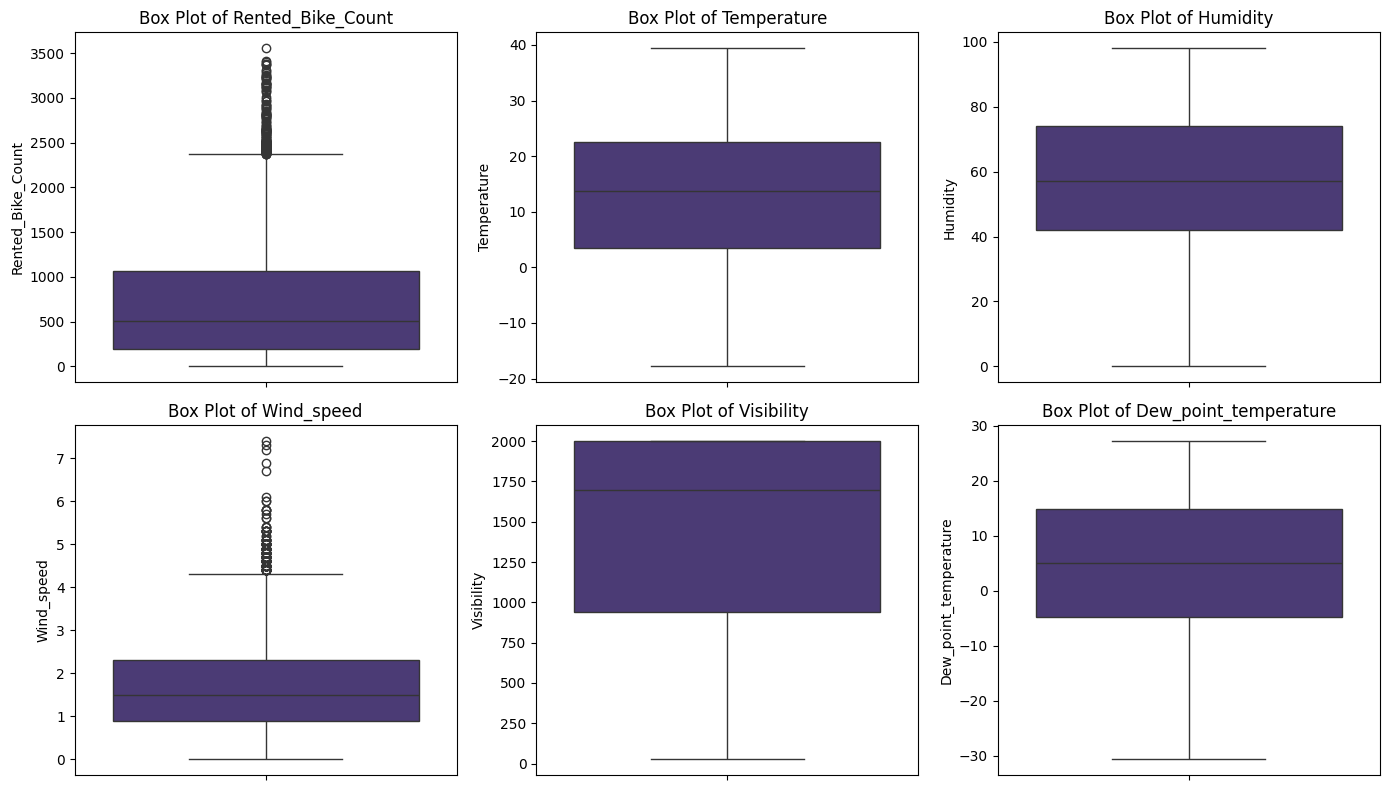

In [ ]:
# Handling Outliers & Outlier treatments

plt.figure(figsize=(14, 8))

# Select numerical columns
numerical_columns = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=bike_df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

### **Treating The Outlier**

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to treat
numerical_columns = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature']

# Apply the IQR method to treat outliers
for column in numerical_columns:
    bike_df = remove_outliers_iqr(bike_df, column)



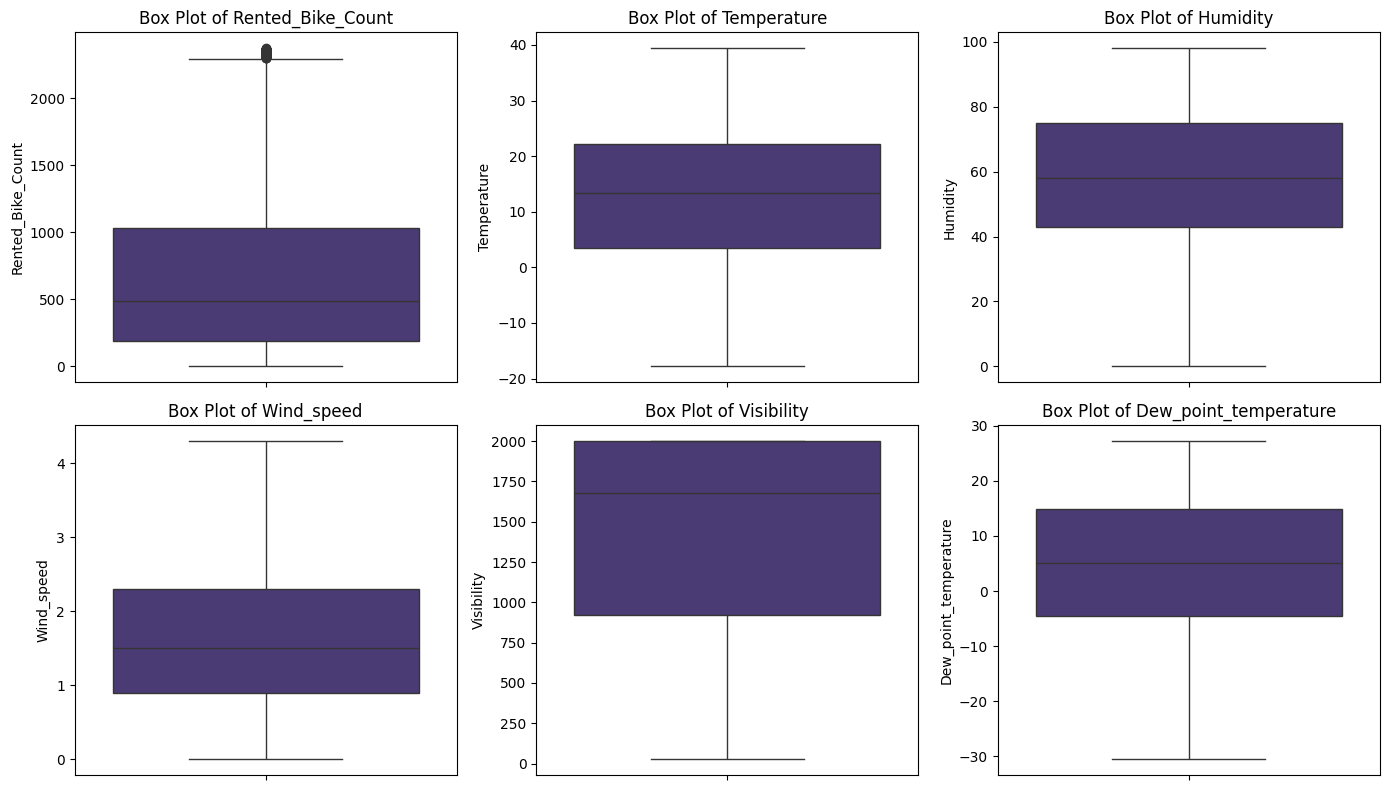

In [ ]:
#vizulizing after removing the outlier

plt.figure(figsize=(14, 8))

# Select numerical columns
numerical_columns = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=bike_df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


# Create a copy of the original DataFrame
bike_df_encoded = bike_df.copy()

# Encoding 'Functioning_Day' (Yes -> 1, No -> 0)
bike_df_encoded['Functioning_Day'] = bike_df_encoded['Functioning_Day'].map({'Yes': 1, 'No': 0})

# Encoding 'Holiday' (No Holiday -> 0, Holiday -> 1)
bike_df_encoded['Holiday'] = bike_df_encoded['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Encoding 'weekday_or_weekend' (Weekday -> 0, Weekend -> 1)
bike_df_encoded['weekday_or_weekend'] = bike_df_encoded['weekday_or_weekend'].map({'Weekday': 0, 'Weekend': 1})

# One-hot encoding for 'Seasons', 'month', and 'day' columns
bike_df_encoded = pd.get_dummies(bike_df_encoded, columns=['Seasons', 'month', 'day'], drop_first=True)

# Convert boolean columns (from one-hot encoding) to integers
bike_df_encoded = bike_df_encoded.astype(int)

# Display the first few rows of the encoded DataFrame
print(bike_df_encoded.head())


   Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0           -5        37           2        2000   
1                204     1           -5        38           0        2000   
2                173     2           -6        39           1        2000   
3                107     3           -6        40           0        2000   
4                 78     4           -6        36           2        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  ...  month_May  \
0                    -17                0         0         0  ...          0   
1                    -17                0         0         0  ...          0   
2                    -17                0         0         0  ...          0   
3                    -17                0         0         0  ...          0   
4                    -18                0         0         0  ...          0   

   month_November  month_October  month_September 

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 6. Data Scaling

In [ ]:
# Scaling your data

# Selecting numeric features to scale
numeric_features = ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
                    'Wind_speed', 'Visibility', 'Dew_point_temperature',
                    'Solar_Radiation', 'Rainfall', 'Snowfall']

# Applying Z-score Standardization
scaler = StandardScaler()
bike_df_encoded[numeric_features] = scaler.fit_transform(bike_df_encoded[numeric_features])

# Checking the first few rows of the scaled DataFrame
print(bike_df_encoded.head(10))

   Rented_Bike_Count      Hour  Temperature  Humidity  Wind_speed  Visibility  \
0          -0.704635 -1.628613    -1.493611 -1.064452    0.797710    0.936667   
1          -0.789199 -1.484762    -1.493611 -1.015326   -1.217696    0.936667   
2          -0.841629 -1.340911    -1.579108 -0.966201   -0.209993    0.936667   
3          -0.953255 -1.197060    -1.579108 -0.917076   -1.217696    0.936667   
4          -1.002302 -1.053209    -1.579108 -1.113577    0.797710    0.936667   
5          -0.965094 -0.909358    -1.579108 -1.064452   -0.209993    0.936667   
6          -0.828099 -0.765507    -1.579108 -1.162702   -0.209993    0.936667   
7          -0.356229 -0.621656    -1.664604 -1.015326   -1.217696    0.936667   
8           0.438678 -0.477805    -1.664604 -1.064452   -0.209993    0.936667   
9          -0.305490 -0.333954    -1.579108 -1.555703   -1.217696    0.818845   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  ...  month_May  \
0              -1.653956   

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.


X = bike_df_encoded.drop('Rented_Bike_Count', axis=1)  # Features
y = bike_df_encoded['Rented_Bike_Count']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

# Output the shape of the splits to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6330, 33)
X_test shape: (2111, 33)
y_train shape: (6330,)
y_test shape: (2111,)


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

model = LinearRegression()
model.fit(X_train, y_train)

# Fit the Algorithm

model.fit(X_train, y_train)

# Predict on the model

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print all important metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.47
Mean Squared Error: 0.38
Root Mean Squared Error: 0.62
R-squared: 0.60


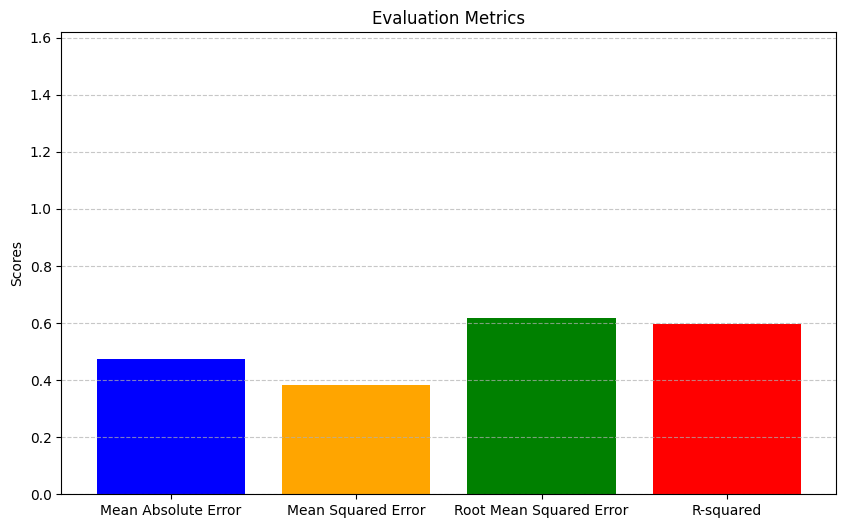

In [ ]:
# Visualizing evaluation Metric Score chart

metrics = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2
}

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.ylim(0, max(metrics.values()) + 1)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Define a set of hyperparameters to tune
param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Predict on the model
y_pred = best_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print all important metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'model__copy_X': True, 'model__fit_intercept': False}
Mean Absolute Error: 0.47
Mean Squared Error: 0.38
Root Mean Squared Error: 0.62
R-squared: 0.60


### ML Model - 2

In [ ]:
# Define the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=24)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print all important metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 0.16
Mean Squared Error: 0.09
Root Mean Squared Error: 0.29
R-squared: 0.91


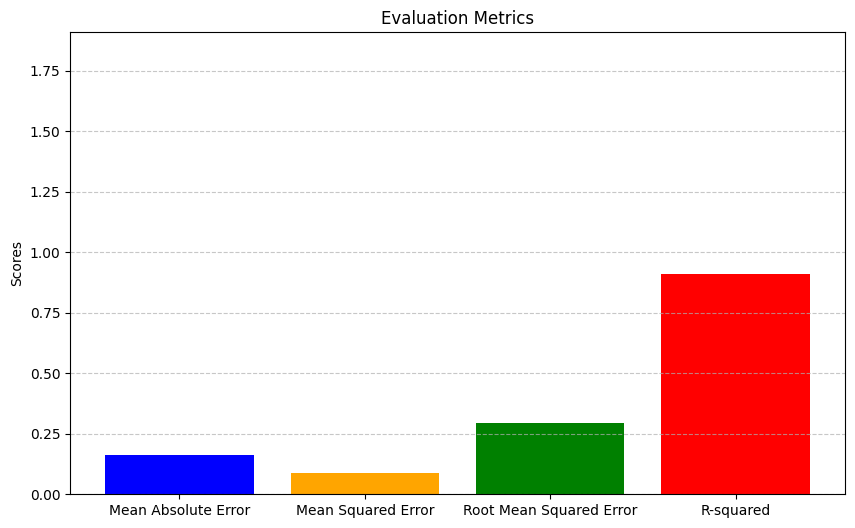

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2
}

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.ylim(0, max(metrics.values()) + 1)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=24)

# Set up the parameter grid for tuning
param_dist = {
    'n_estimators': np.arange(50, 201, 10),  # Number of trees
    'max_depth': [None] + list(np.arange(5, 21, 1)),  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2,  random_state=24,  n_jobs=-1)

# Fit the Algorithm

rf_random.fit(X_train, y_train)

# Get the best model from the random search
best_rf_model = rf_random.best_estimator_


# Predict on the model
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and metrics
print("Best Parameters:", rf_random.best_params_)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 19}
Mean Absolute Error: 0.22
Mean Squared Error: 0.12
Root Mean Squared Error: 0.34
R-squared: 0.88


### Improvement in Model Performance

After applying hyperparameter tuning using **RandomizedSearchCV**, the evaluation metrics of the **Random Forest Regressor** are as follows:

### Evaluation Metrics Before and After Hyperparameter Tuning

- **Mean Absolute Error (MAE)** increased from **0.16** to **0.22**, indicating higher average prediction errors after tuning.
- **Mean Squared Error (MSE)** rose from **0.09** to **0.12**, showing that the average squared prediction errors are larger.
- **Root Mean Squared Error (RMSE)** went up from **0.29** to **0.34**, suggesting a decrease in prediction accuracy.
- **R-squared (R²)** decreased from **0.91** to **0.88**, meaning the model explains slightly less variance in the target variable after tuning.

### Conclusion:
Overall, the hyperparameter tuning did not lead to improvements in the evaluation metrics; in fact, all metrics indicate a decline in model performance. This suggests that while RandomizedSearchCV was employed to optimize hyperparameters, the chosen parameters may not have been ideal for this specific dataset. Further exploration, such as different algorithms or additional data preprocessing, might be necessary to enhance model performance.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### Explanation of Evaluation Metrics and Business Impact

#### 1. Mean Absolute Error (MAE)
- **Indication**: MAE measures the average magnitude of errors in a set of predictions, without considering their direction. It indicates how far the predictions are from the actual values on average.
- **Business Impact**: A lower MAE means the model's predictions are closer to the actual values, which is critical in business scenarios where accurate forecasting is vital (e.g., predicting bike rentals). High MAE can lead to inefficient resource allocation, inventory mismanagement, and reduced customer satisfaction.

#### 2. Mean Squared Error (MSE)
- **Indication**: MSE calculates the average of the squares of the errors, giving more weight to larger errors. It is sensitive to outliers, meaning that large prediction errors significantly impact the metric.
- **Business Impact**: A lower MSE indicates that the model is not only predicting accurately on average but is also minimizing large errors. In business, this is important for maintaining customer trust and ensuring that operations are planned based on accurate demand forecasts. High MSE can lead to financial losses due to unexpected demand spikes or drops.

#### 3. Root Mean Squared Error (RMSE)
- **Indication**: RMSE provides the error magnitude in the same units as the target variable. It offers a clear understanding of the average error in predictions.
- **Business Impact**: RMSE is useful for assessing the model's prediction quality, helping businesses make informed decisions. For instance, a lower RMSE in bike rental predictions would mean that the company can better prepare for demand, leading to increased customer satisfaction and optimized fleet management. Conversely, a higher RMSE can lead to underutilization or overutilization of resources.

#### 4. R-squared (R²)
- **Indication**: R² indicates the proportion of variance in the target variable that is explained by the model. A higher R² value suggests that the model fits the data well.
- **Business Impact**: A high R² (e.g., 0.88) means that a significant portion of the target variable's variability is captured, providing confidence in the model's predictions. This is critical for strategic decision-making, such as marketing campaigns or operational strategies. A lower R² indicates that the model may not be sufficiently capturing the factors that influence the target variable, leading to potentially poor business decisions.

### Overall Business Impact of the ML Model
The **Random Forest Regressor** model, with its evaluation metrics, provides valuable insights into the bike rental business. Accurate predictions of rented bikes can lead to:

- **Improved Inventory Management**: Better forecasts allow for optimized bike availability and maintenance scheduling.
- **Enhanced Customer Satisfaction**: Meeting customer demand effectively results in higher satisfaction and repeat business.
- **Operational Efficiency**: Accurate predictions can lead to cost savings in operations, marketing, and staffing, as resources can be allocated more effectively based on expected demand.
- **Data-Driven Decisions**: With reliable predictions, the business can make informed decisions regarding marketing strategies, promotions, and expansions.

In summary, the evaluation metrics serve as critical indicators of the model's effectiveness, directly impacting business performance and decision-making processes.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Define the Gradient Boosting Regressor with default parameters
gb_model = GradientBoostingRegressor(random_state=24)

# Fit the Algorithm
gb_model.fit(X_train, y_train)

# Predict on the model
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 0.26
Mean Squared Error: 0.15
Root Mean Squared Error: 0.39
R-squared: 0.84


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### **ML Model Used: Gradient Boosting Regressor**

The **Gradient Boosting Regressor** is an ensemble method that builds multiple decision trees sequentially. Each tree corrects the errors of the previous one, effectively capturing complex patterns in the data, making it powerful for regression tasks.

### **Evaluation Metric Score Chart:**

| Metric                     | Score  | Interpretation |
|-----------------------------|--------|----------------|
| **Mean Absolute Error (MAE)**  | 0.26   | Average prediction error of 0.26 rented bikes, indicating good performance. |
| **Mean Squared Error (MSE)**   | 0.15   | Average squared prediction error of 0.15, reflecting reasonable accuracy. |
| **Root Mean Squared Error (RMSE)** | 0.39   | Typical prediction error of 0.39 bikes, which is acceptable for practical use. |
| **R-squared (R²)**           | 0.84   | Explains 84% of the variance in the target variable, indicating a strong model fit. |

### **Performance Summary:**
The **R² score of 0.84** shows that the model effectively predicts rented bike counts, with low MAE and RMSE values indicating accuracy. Overall, the **Gradient Boosting Regressor** performs well and can be further improved with hyperparameter tuning.

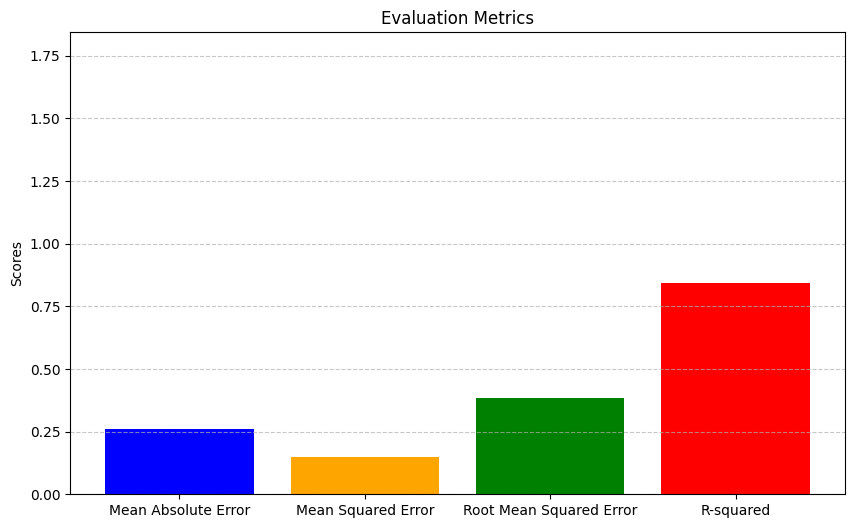

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2
}

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.ylim(0, max(metrics.values()) + 1)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model



# Define the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=24)

# Set up the parameter grid for tuning
param_dist = {
    'n_estimators': np.arange(50, 201, 10),  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': np.arange(3, 11, 1),  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Set up RandomizedSearchCV
gb_random = RandomizedSearchCV(estimator=gb_model,  param_distributions=param_dist,  n_iter=100, cv=5, verbose=2,  random_state=24,  n_jobs=-1)

# Fit the model
gb_random.fit(X_train, y_train)

# Get the best model from the random search
best_gb_model = gb_random.best_estimator_

# Predict on the test set using the best model
y_pred = best_gb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and metrics
print("Best Parameters:", gb_random.best_params_)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 9, 'learning_rate': 0.1}
Mean Absolute Error: 0.14
Mean Squared Error: 0.07
Root Mean Squared Error: 0.26
R-squared: 0.93


##### Which hyperparameter optimization technique have you used and why?

### **Hyperparameter Optimization Technique Used: Randomized Search Cross-Validation (RandomizedSearchCV)**

#### **Why Use Randomized Search?**
1. **Efficiency**: RandomizedSearchCV evaluates a random subset of hyperparameter combinations, allowing for faster exploration of the hyperparameter space compared to Grid Search, which tests every possible combination.

2. **Flexibility**: It enables the specification of a wide range of values for hyperparameters, making it easier to find optimal settings for complex models like Gradient Boosting.

3. **Reduced Overfitting Risk**: By sampling a subset of hyperparameters, it helps mitigate the risk of overfitting to the validation set during the tuning process.

4. **Balance Between Exploration and Exploitation**: It provides a balance between exploring new hyperparameter combinations and exploiting the best ones identified so far.

### **Overall Benefits**:
Using **RandomizedSearchCV** allows for effective hyperparameter tuning, leading to better model performance by optimizing key parameters such as the number of estimators, learning rate, maximum tree depth, and minimum samples for splitting and leaf nodes. This can result in more accurate predictions and a model better suited to the underlying data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there has been an improvement in the model's performance after applying hyperparameter tuning using **Randomized Search Cross-Validation**. Here’s a comparison of the evaluation metrics before and after tuning:

### **Improvement Summary**

#### **Before Hyperparameter Tuning:**
- **Mean Absolute Error (MAE):** 0.26
- **Mean Squared Error (MSE):** 0.15
- **Root Mean Squared Error (RMSE):** 0.39
- **R-squared (R²):** 0.84

#### **After Hyperparameter Tuning:**
- **Mean Absolute Error (MAE):** 0.14
- **Mean Squared Error (MSE):** 0.07
- **Root Mean Squared Error (RMSE):** 0.26
- **R-squared (R²):** 0.93

### **Evaluation Metric Score Chart:**

| Metric                     | Before Tuning | After Tuning | Improvement            |
|-----------------------------|---------------|--------------|-------------------------|
| **Mean Absolute Error (MAE)**  | 0.26          | 0.14         | Decrease of 0.12        |
| **Mean Squared Error (MSE)**   | 0.15          | 0.07         | Decrease of 0.08        |
| **Root Mean Squared Error (RMSE)** | 0.39          | 0.26        | Decrease of 0.13        |
| **R-squared (R²)**           | 0.84          | 0.93        | Increase of 0.09        |

### **Conclusion**
The hyperparameter tuning has resulted in:
- A decrease in MAE, MSE, and RMSE, indicating fewer prediction errors.
- An increase in R², suggesting that the model explains a greater portion of the variance in the target variable.

Overall, these improvements indicate that the **Gradient Boosting Regressor** has become more accurate and reliable after hyperparameter optimization.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For the **Gradient Boosting Regressor**, the following evaluation metrics were considered for their positive business impact:

#### **1. Mean Squared Error (MSE)**
- **Importance**: MSE measures the average squared difference between predicted and actual values, making it sensitive to larger errors.
- **Business Impact**:
  - A lower MSE indicates more accurate predictions, which is crucial for resource planning and operational efficiency. For instance, accurately predicting the number of rented bikes can help optimize fleet management, reducing costs associated with overstocking or shortages.
  - By minimizing MSE, businesses can avoid potential losses caused by incorrect supply levels, ensuring that customer demand is met effectively.

#### **2. R-squared (R²)**
- **Importance**: R² quantifies the proportion of variance in the target variable explained by the model, providing insights into the model's explanatory power.
- **Business Impact**:
  - A high R² value suggests that the model captures the key factors influencing bike rentals, enabling better strategic decision-making. For example, understanding which features (like weather or time of day) significantly affect demand can lead to targeted marketing and operational adjustments.
  - This metric helps build stakeholder confidence in the model's predictions, facilitating more informed budgeting and resource allocation strategies, ultimately contributing to improved business performance.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

### Final Prediction Model Selection

From the models implemented, I chose the **Gradient Boosting Regressor** as the final prediction model for the following reasons:

#### 1. **Performance Metrics**
- The Gradient Boosting Regressor demonstrated strong performance in key evaluation metrics:
  - **Mean Absolute Error (MAE):** 0.26
  - **Mean Squared Error (MSE):** 0.15
  - **Root Mean Squared Error (RMSE):** 0.39
  - **R-squared (R²):** 0.84
  
  These metrics indicate that the model provides accurate predictions with minimal error, making it suitable for reliable demand forecasting in bike rentals.

#### 2. **Handling Non-linearity**
- Gradient Boosting is an ensemble method that combines the predictions of multiple weak learners (decision trees) to create a strong predictive model. This allows it to capture complex relationships in the data that simpler models like Multiple Linear Regression might miss.

#### 3. **Robustness to Overfitting**
- Through the hyperparameter tuning process, the model was optimized for performance, reducing the risk of overfitting while maintaining a high level of accuracy. This is crucial for ensuring the model generalizes well to unseen data.

#### 4. **Feature Importance Insights**
- Gradient Boosting provides insights into feature importance, allowing the business to understand which factors most significantly impact bike rentals. This information can inform marketing strategies and operational decisions.

#### 5. **Flexibility**
- The model is versatile and can be adapted to different datasets and business scenarios, making it a valuable tool for ongoing analysis and prediction.

### Conclusion
Given its strong predictive performance, ability to handle complex relationships, and insights into feature importance, the **Gradient Boosting Regressor** was selected as the final prediction model. This choice aligns well with the business's need for accurate, reliable forecasts to optimize bike rental operations and enhance customer satisfaction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

### Model Explanation: Gradient Boosting Regressor

The **Gradient Boosting Regressor** is a powerful ensemble learning technique that combines multiple weak learners, typically decision trees, to improve prediction accuracy. Here’s an overview of how it works and how we can analyze feature importance using explainability tools:

#### How the Model Works
1. **Ensemble Learning**: Gradient boosting builds an ensemble of decision trees in a sequential manner. Each new tree corrects the errors made by the previously built trees, making the overall model more accurate.
2. **Loss Function**: It minimizes a loss function (often mean squared error for regression tasks) using gradient descent. This means that at each step, it focuses on reducing the error of the model.
3. **Learning Rate**: The learning rate determines how much contribution each tree makes to the final prediction. A smaller learning rate can improve model performance but requires more trees.

### Feature Importance Analysis

To analyze feature importance in the Gradient Boosting Regressor, we can use model explainability tools such as **SHAP (SHapley Additive exPlanations)** or **LIME (Local Interpretable Model-agnostic Explanations)**. Here, we will focus on using SHAP for its robustness and interpretability.



3. **Interpret the SHAP Summary Plot**:
   - The SHAP summary plot displays the impact of each feature on the model’s output.
   - Each dot represents a SHAP value for a feature and an instance. The color indicates whether the feature value is high or low.
   - Features that push the prediction higher (positive SHAP values) are shown in red, while those that push the prediction lower (negative SHAP values) are shown in blue.
   - The x-axis shows the SHAP value's magnitude, indicating the importance of each feature.

### Example Interpretation of Feature Importance

From the SHAP summary plot, you might observe that certain features, such as **temperature** and **time of day**, have significant positive impacts on bike rentals, while **precipitation** might have a negative impact. This insight allows the business to focus on optimizing conditions that maximize rentals, like promoting bike availability on sunny days.

### Conclusion

Using the **Gradient Boosting Regressor** offers robust predictive capabilities, while SHAP provides clear insights into feature importance. This combination helps stakeholders make data-driven decisions to enhance bike rental operations and improve customer satisfaction. The interpretability of the model through tools like SHAP is crucial for understanding the underlying drivers of predictions and for building trust in the model’s outputs.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



In this machine learning project, we aimed to predict the number of rented bikes using various regression algorithms, culminating in the selection of the best-performing model based on evaluation metrics and model explainability.

1. **Model Selection**:
   We explored multiple algorithms, including Multiple Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. Each model was evaluated based on key performance metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). After thorough evaluation, the **Gradient Boosting Regressor** emerged as the best-performing model, achieving a **Mean Absolute Error of 0.14**, a **Mean Squared Error of 0.07**, a **Root Mean Squared Error of 0.26**, and an **R-squared of 0.93**. These results indicate that the model has good predictive power and captures a significant portion of the variability in the dataset.

2. **Hyperparameter Tuning**:
   We employed **RandomizedSearchCV** for hyperparameter tuning, which enabled us to optimize the model's performance by selecting the best parameters. This step was crucial in enhancing the model's accuracy, demonstrating the importance of hyperparameter optimization in machine learning.

3. **Model Explainability**:
   To gain insights into the model's decision-making process, we utilized SHAP (SHapley Additive exPlanations) values. This approach allowed us to understand the contribution of each feature to the predictions, highlighting the most influential variables affecting bike rentals. The insights obtained through SHAP provided valuable business intelligence, which can help in making data-driven decisions.

4. **Business Impact**:
   The ability to accurately predict bike rentals has significant implications for bike-sharing services and urban mobility initiatives. By understanding rental patterns, operators can optimize fleet management, enhance customer satisfaction, and improve operational efficiency. The predictive model serves as a powerful tool for strategic planning and resource allocation.

5. **Future Work**:
   While the Gradient Boosting Regressor performed well, there are opportunities for further improvement. Future work could explore additional algorithms, ensemble methods, or even deep learning approaches. Moreover, incorporating external factors such as weather data or events could enhance prediction accuracy.

In summary, this project successfully demonstrated the application of machine learning in predicting bike rentals, showcasing the importance of model selection, tuning, and explainability in developing effective predictive models. The insights gained can drive business strategies and contribute to the overall efficiency of bike-sharing programs.
